HOG FOR FEATURE EXTRACTION

In [2]:
import os
import numpy as np
import cv2
from skimage.feature import hog
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle

# Step 1: Define paths and categories
dataset_path = 'data'
categories = os.listdir(dataset_path)

print(f"Categories found: {categories}")

# Step 2: Initialize parameters for HOG feature extraction
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)
block_norm = 'L2-Hys'
image_size = (128, 64)  # All images are resized to 128x64 pixels for consistency.

# Step 3: Load all images and extract HOG features
data = []
labels = []

for category in categories:
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        print(f"Processing category: {category}")
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            if img_name.lower().endswith(('.jpg', '.png')):
                # Read and convert image to grayscale
                img = cv2.imread(img_path)
                gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                
                # Resize the image to a fixed size (128x64)
                resized_img = cv2.resize(gray_img, image_size)

                # Extract HOG features
                hog_features = hog(
                    resized_img,
                    orientations=orientations,
                    pixels_per_cell=pixels_per_cell,
                    cells_per_block=cells_per_block,
                    visualize=False,  
                    block_norm=block_norm
                )

                # Append data and labels
                data.append(hog_features.flatten())
                labels.append(category)

# Step 4: Shuffle data and encode labels
data = np.array(data)
labels = np.array(labels)
data, labels = shuffle(data, labels, random_state=42)

print(f"Total images processed: {len(data)}")
print(f"Labels before encoding: {labels[:10]}")  # Show first 10 labels before encoding

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

print(f"Labels after encoding: {labels[:10]}")  # Show first 10 encoded labels

# Step 5: Feature Scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 6: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled, labels, test_size=0.2, random_state=42, stratify=labels)

print(f"Training data size: {X_train.shape[0]}, Test data size: {X_test.shape[0]}")

# Step 7: Train RandomForest model for feature selection
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)



Categories found: ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'agree', 'B', 'book', 'break', 'C', 'change', 'congratulations', 'D', 'E', 'email', 'F', 'file', 'G', 'good morning', 'H', 'happy birthday', 'how are you', 'hungry', 'I', 'i need help', 'J', 'K', 'keepsmile', 'L', 'M', 'N', 'O', 'P', 'pass', 'please', 'Q', 'R', 'remember', 'S', 'sick', 'stop', 'T', 'thirsty', 'U', 'V', 'W', 'wait', 'where', 'X', 'Y', 'Z']
Processing category: 1
Processing category: 2
Processing category: 3
Processing category: 4
Processing category: 5
Processing category: 6
Processing category: 7
Processing category: 8
Processing category: 9
Processing category: A
Processing category: agree
Processing category: B
Processing category: book
Processing category: break
Processing category: C
Processing category: change
Processing category: congratulations
Processing category: D
Processing category: E
Processing category: email
Processing category: F
Processing category: file
Processing category: G
Process

RandomForestClassifier(n_jobs=-1, random_state=42)

In [15]:
# print(data_scaled)

In [3]:
print(f"Number of features before selection: {X_train.shape[1]}")
feature_importances = rf_model.feature_importances_

k = 1000  # Number of top features to select
top_k_features = SelectFromModel(rf_model, max_features=k, prefit=True)

X_train_selected = top_k_features.transform(X_train)
X_test_selected = top_k_features.transform(X_test)

print(f"Reduced feature size: {X_train_selected.shape[1]}")

# Step 9: Train RandomForest model with selected features
rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model_selected.fit(X_train_selected, y_train)

print("RandomForest model trained successfully with selected features.")

# Step 10: Predict on test set and evaluate
y_pred = rf_model_selected.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set after feature selection: {accuracy:.4f}")

# Classification Report
print("Classification Report after Feature Selection:")
print(classification_report(y_test, y_pred, zero_division=1))

# Confusion Matrix
print("Confusion Matrix after Feature Selection:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Number of features before selection: 3780
Reduced feature size: 1000
RandomForest model trained successfully with selected features.
Accuracy on test set after feature selection: 0.9871
Classification Report after Feature Selection:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       1.00      1.00      1.00       240
           2       1.00      1.00      1.00       240
           3       1.00      1.00      1.00       240
           4       1.00      1.00      1.00       240
           5       1.00      1.00      1.00       240
           6       1.00      1.00      1.00       240
           7       1.00      1.00      1.00       240
           8       1.00      1.00      1.00       240
           9       1.00      1.00      1.00       240
          10       1.00      1.00      1.00       240
          11       1.00      1.00      1.00       240
          12       1.00      1.00      1.00       240
          

Actual Category: book
Predicted Category: book


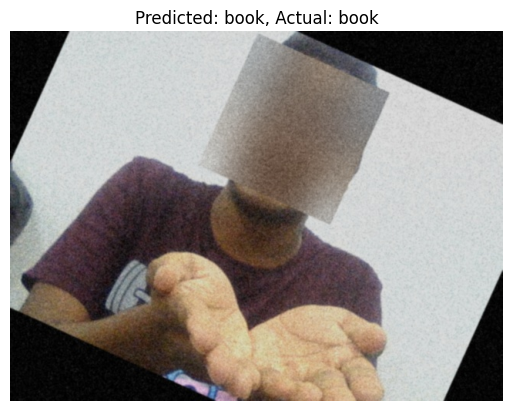

Actual Category: O
Predicted Category: O


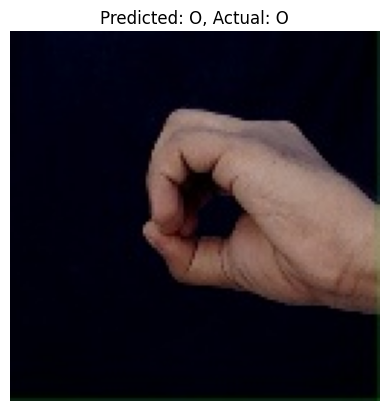

Actual Category: Y
Predicted Category: Y


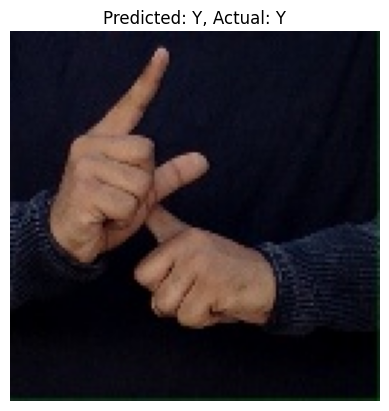

Actual Category: E
Predicted Category: E


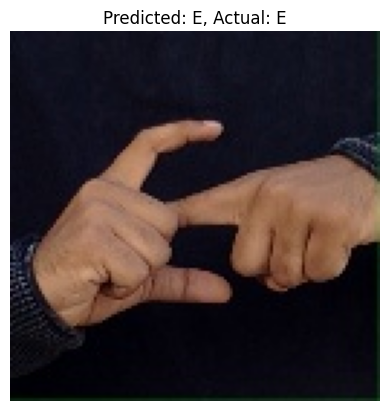

Actual Category: A
Predicted Category: A


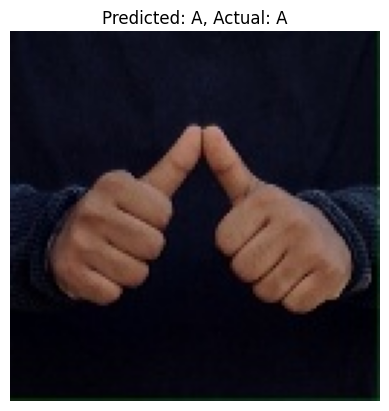

Actual Category: happy birthday
Predicted Category: happy birthday


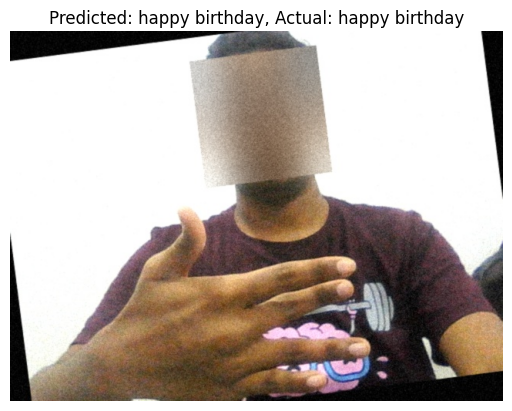

Actual Category: W
Predicted Category: W


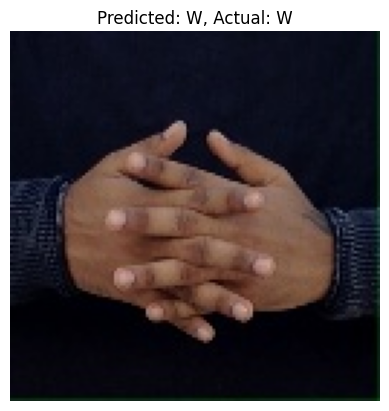

Actual Category: break
Predicted Category: break


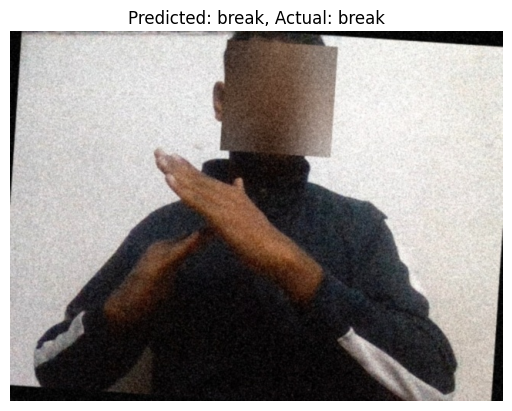

Actual Category: S
Predicted Category: S


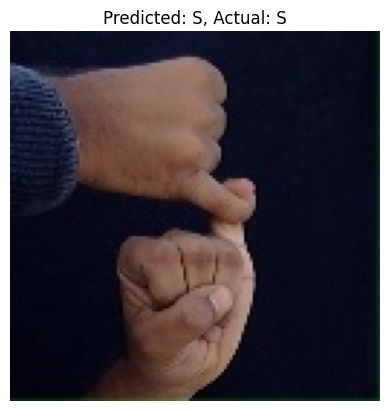

Actual Category: good morning
Predicted Category: good morning


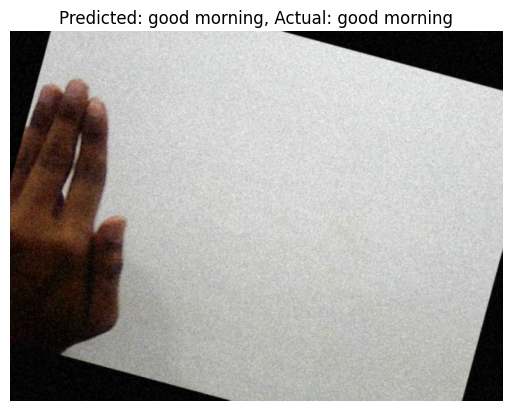

In [4]:
import cv2
import matplotlib.pyplot as plt

for i in range(0,10):
# Step 8: Predict on a test sample and display
    sample_index = i  # You can change this to pick any index from your test set
    sample_image = X_test_selected[sample_index]
    sample_label = y_test[sample_index]

    # Predict the label for the selected test sample
    predicted_label = rf_model_selected.predict([sample_image])

    # Decode the predicted and actual labels back to their original categories
    predicted_category = label_encoder.inverse_transform(predicted_label)[0]
    actual_category = label_encoder.inverse_transform([sample_label])[0]

    # Display the prediction
    print(f"Actual Category: {actual_category}")
    print(f"Predicted Category: {predicted_category}")

    # Retrieve the file path of the image corresponding to the test sample
    # You need to map the sample_index back to the image path in your dataset
    category_name = label_encoder.inverse_transform([sample_label])[0]
    category_path = os.path.join(dataset_path, category_name)

    # Get image name corresponding to sample_index in the category
    img_name = os.listdir(category_path)[sample_index]  # Assumes consistent order

    # Construct the full image path
    img_path = os.path.join(category_path, img_name)

    # Read the image
    img = cv2.imread(img_path)

    # # Convert BGR (OpenCV format) to RGB (Matplotlib format)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image using Matplotlib
    plt.imshow(img_rgb)
    plt.title(f"Predicted: {predicted_category}, Actual: {actual_category}")
    plt.axis('off')  # Hide axes
    plt.show()
